# Evaluation Project - 2
Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

Importing diferrent libraries for EDA, data wrangling,data cleaning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Avocado.csv') # importing data
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 18249
No of Columns: 14


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [9]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [11]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [12]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
df.duplicated().sum()

0

Data dont have any duplicate value

<AxesSubplot:>

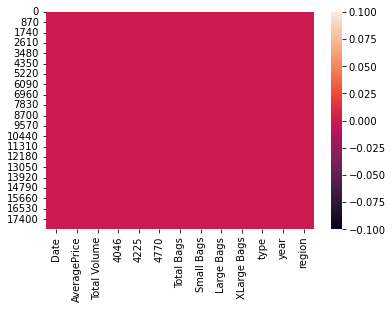

In [14]:
sns.heatmap(df.isnull())

There is no missing value as well

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Comment :

There are 13 features in data.

Region has object datatype.

Date by default data type is object which need to changed to datetime datatype.

Other variable are float & int datatypes.

In [17]:
df['Date']=pd.to_datetime(df.Date)

In [18]:
df['Date'].dtype

dtype('<M8[ns]')

<AxesSubplot:>

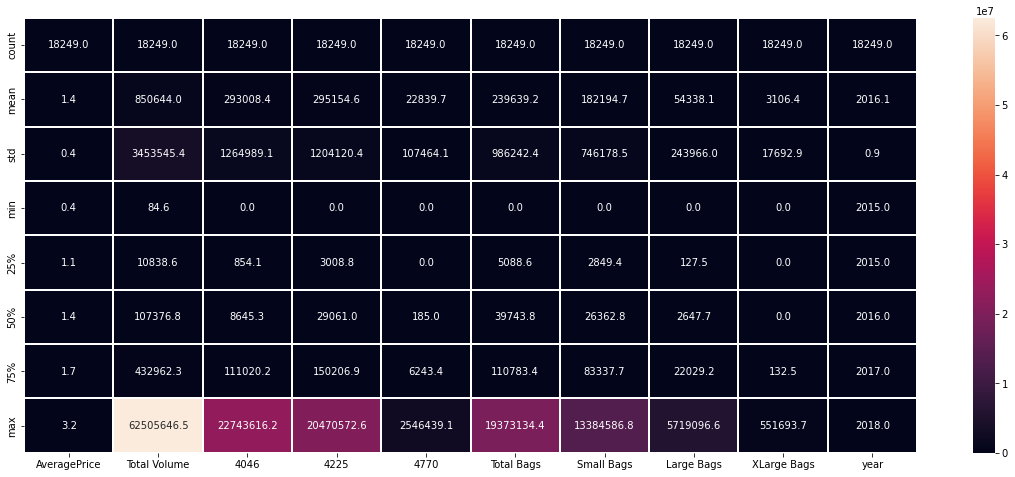

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [20]:
df.describe().T.round(2)

count       mean         std      min       25%        50%  \
AveragePrice  18249.0       1.41        0.40     0.44      1.10       1.37   
Total Volume  18249.0  850644.01  3453545.36    84.56  10838.58  107376.76   
4046          18249.0  293008.42  1264989.08     0.00    854.07    8645.30   
4225          18249.0  295154.57  1204120.40     0.00   3008.78   29061.02   
4770          18249.0   22839.74   107464.07     0.00      0.00     184.99   
Total Bags    18249.0  239639.20   986242.40     0.00   5088.64   39743.83   
Small Bags    18249.0  182194.69   746178.51     0.00   2849.42   26362.82   
Large Bags    18249.0   54338.09   243965.96     0.00    127.47    2647.71   
XLarge Bags   18249.0    3106.43    17692.89     0.00      0.00       0.00   
year          18249.0    2016.15        0.94  2015.00   2015.00    2016.00   

                    75%          max  
AveragePrice       1.66         3.25  
Total Volume  432962.29  62505646.52  
4046          111020.20  22743616.17  
4225          150206.86  20470572.61  
4770            6243.42   2546439.11  
Total Bags    110783.37  19373134.37  
Small Bags     83337.67  13384586.80  
Large Bags     22029.25   5719096.61  
XLarge Bags      132.50    551693.65  
year            2017.00      2018.00

Comment :

We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
For most of columns have minimum value of zero.

Almost in all columns value of mean is greater than median. Data is right skewed.

For most of columns value of std. deviation is greater than mean i.e. data is spread.

In [21]:
print('Minimum Price of Avocado :',df.AveragePrice.min(),'$')
print('Maximum Price of avacado :',df.AveragePrice.max(),'$')
print('Average Price of avacado :',df.AveragePrice.mean(),'$')

Minimum Price of Avocado : 0.44 $
Maximum Price of avacado : 3.25 $
Average Price of avacado : 1.4059784097758825 $


We can say maximum price is 3.25, minium is 0.44 and average is 1.4 approx 

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='AveragePrice', ylabel='Density'>

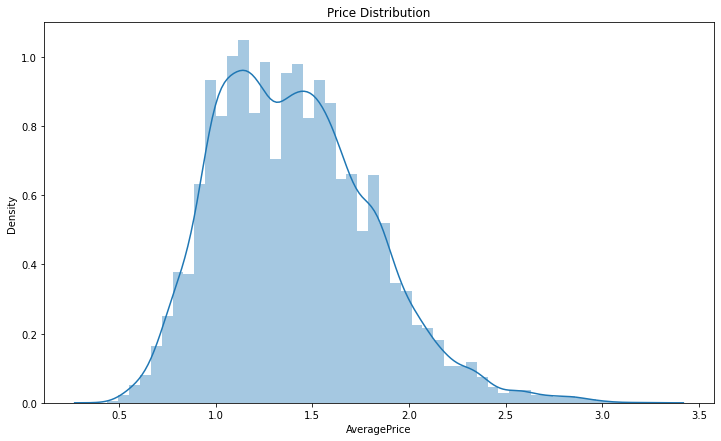

In [34]:
plt.figure(figsize=(12,7))
plt.title('Price Distribution')
sns.distplot(df["AveragePrice"])

Maximum price are in the range of 1,2 

In [35]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [36]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

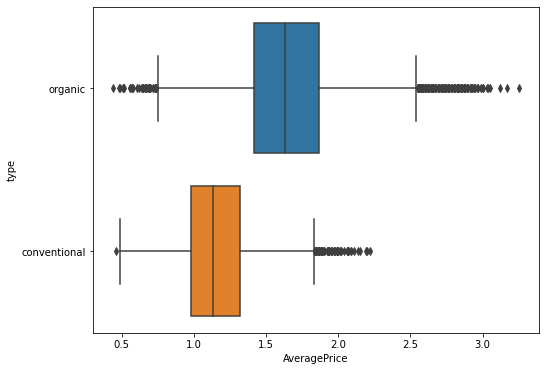

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df)

Comment :

Oraganic Avocado is more costlier than conventional Avacado almost by morethan 40%

This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience and also health cautious and quality oriented people are willing to pay more price for it

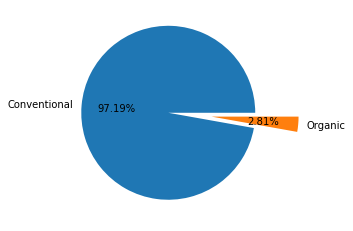

In [38]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.3,0.2])
plt.show()

In [39]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

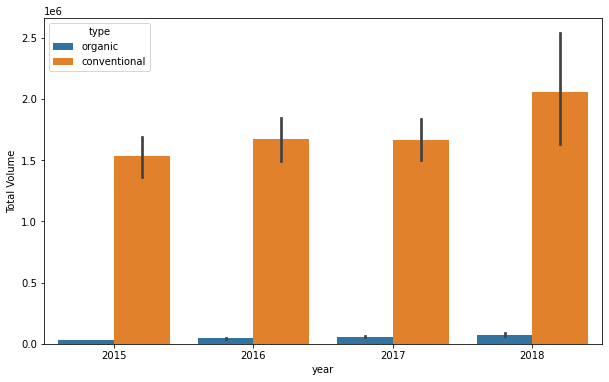

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df)
plt.show()

Comment -

Conventional Avacado are in more demand.

Barplot confirm same thing in yearwise sales volume.


In [41]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

Comment :

Oraganic Avocado is costlier than conventional avacado.

Avacodo got price decline in year 2017 as result of some reason may be inflation,shortage, more wages.

Except 2017 each year their is incresase in price of avacado.


In [42]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [43]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

Comment :

Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.

30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
XLarge Bags sales increase rapidly in 2017 compare to 2015 but decine in 2018

If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of 
Conventional type. May be quantity & discount offer by shop may be playing role here.

People choosing small bags of organic avocado over large.Price factor playing here.

In [44]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

In [45]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

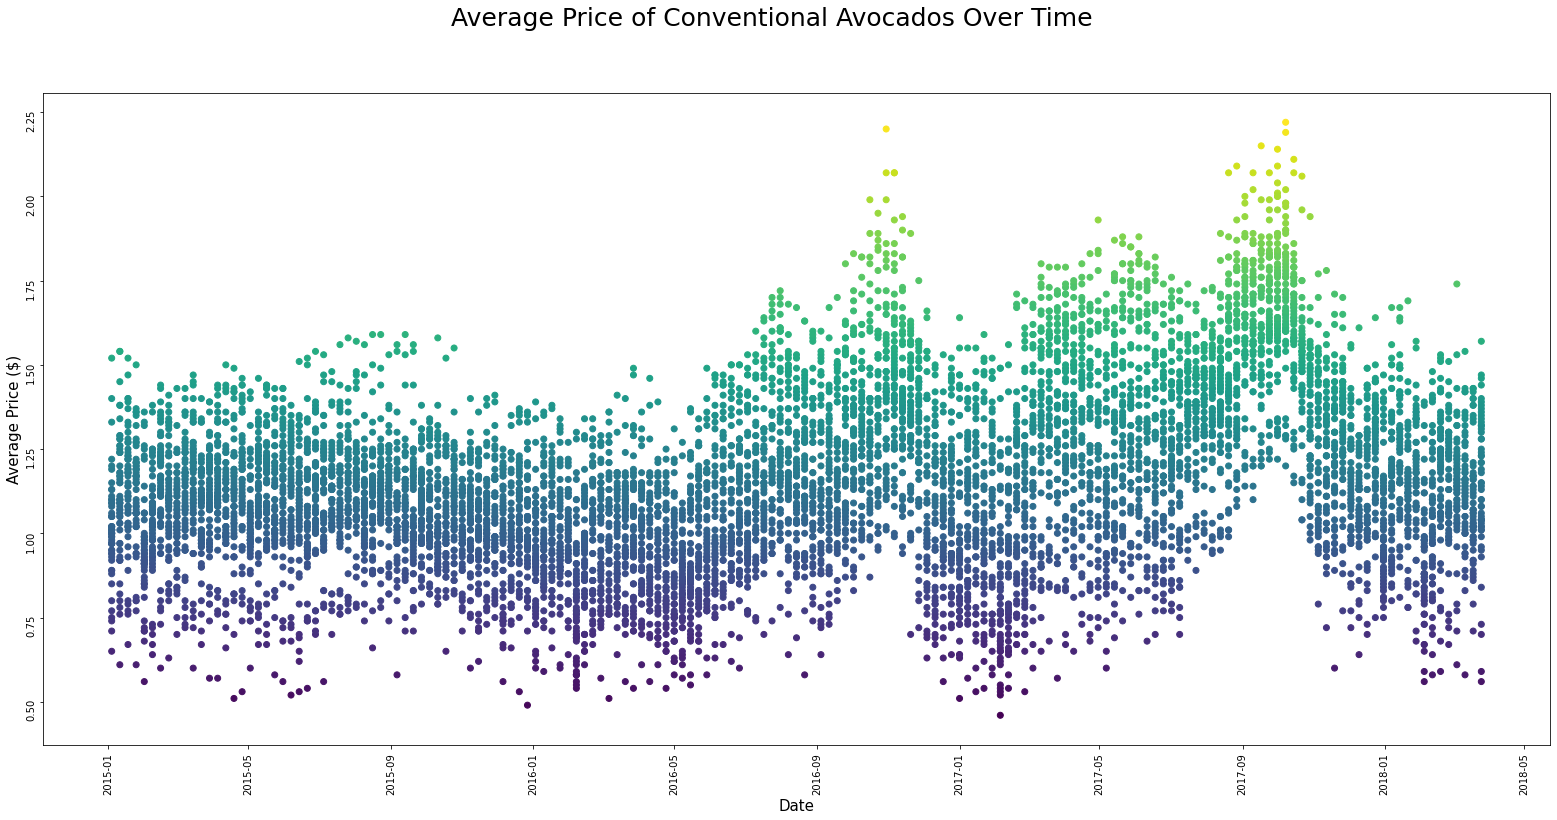

In [46]:
# Average price of Conventional Avocados over time
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices)
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price ($)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

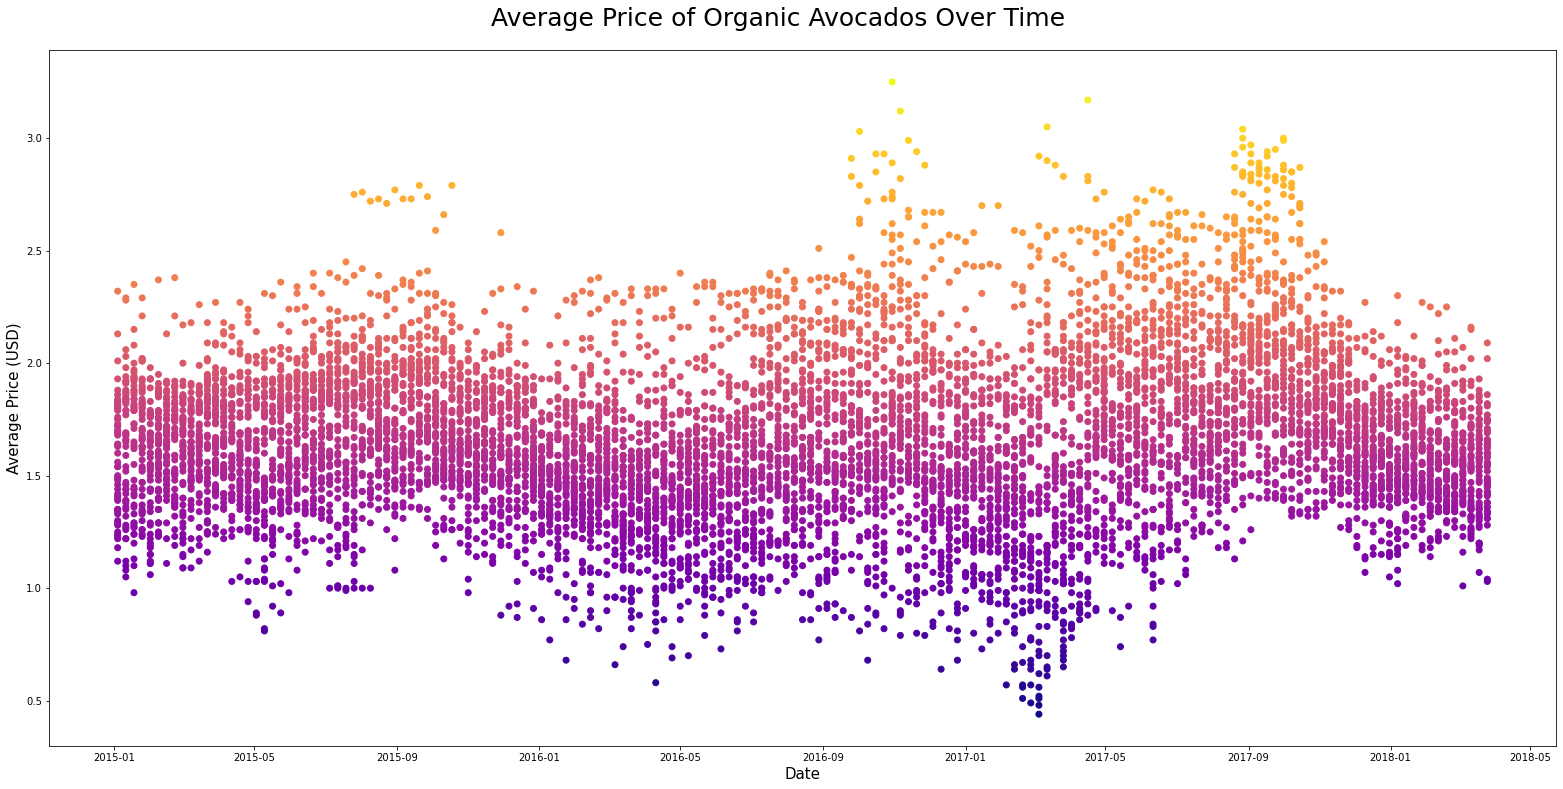

In [47]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

# EDA

In [48]:
df.head()

Date  AveragePrice  Total Volume       4046       4225     4770  \
11569 2015-01-04          1.75      27365.89    9307.34    3844.81   615.28   
11829 2015-01-04          1.46     612910.15  233286.13  216611.20  4370.99   
11777 2015-01-04          1.70       1885.48     748.62      30.19     0.00   
675   2015-01-04          0.99     668086.00  117454.09  429518.41  5553.60   
1247  2015-01-04          0.92     101162.98    1991.63   75090.16   283.88   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36         0.00       organic  2015   
11829   158641.83   115068.71    43573.12         0.00       organic  2015   
11777     1106.67     1106.67        0.00         0.00       organic  2015   
675     115559.90    67894.33    47661.52         4.05  conventional  2015   
1247     23797.31     7769.36    16027.95         0.00  conventional  2015   

           region  
11569   Southeast  
11829     TotalUS  
11777       Tampa  
675        Denver  
1247   Louisville

In [49]:
df2=df.copy()

In [50]:
#Creating Data Type for Numeric features
df2.drop(['Date','type','year','region'],axis=1,inplace=True)

In [51]:
df2

AveragePrice  Total Volume       4046       4225     4770  Total Bags  \
11569          1.75      27365.89    9307.34    3844.81   615.28    13598.46   
11829          1.46     612910.15  233286.13  216611.20  4370.99   158641.83   
11777          1.70       1885.48     748.62      30.19     0.00     1106.67   
675            0.99     668086.00  117454.09  429518.41  5553.60   115559.90   
1247           0.92     101162.98    1991.63   75090.16   283.88    23797.31   
...             ...           ...        ...        ...      ...         ...   
8670           1.21     330371.24   87782.44  137599.47   131.89   104857.44   
17997          1.52      15372.80    2399.71    3164.80     0.00     9808.29   
17733          1.46      31489.27    5372.35    1047.92     0.00    25069.00   
8706           1.05     228837.36   53795.52   53103.06  7008.97   114929.81   
8814           1.34    1774776.77   63905.98  908653.71   843.45   801373.63   

       Small Bags  Large Bags  XLarge Bags  
11569    13061.10      537.36         0.00  
11829   115068.71    43573.12         0.00  
11777     1106.67        0.00         0.00  
675      67894.33    47661.52         4.05  
1247      7769.36    16027.95         0.00  
...           ...         ...          ...  
8670     95210.59     7089.08      2557.77  
17997     9789.70       18.59         0.00  
17733    23054.17     2014.83         0.00  
8706     96343.12    15834.92      2751.77  
8814    774634.09    23833.93      2905.61  

[18249 rows x 9 columns]

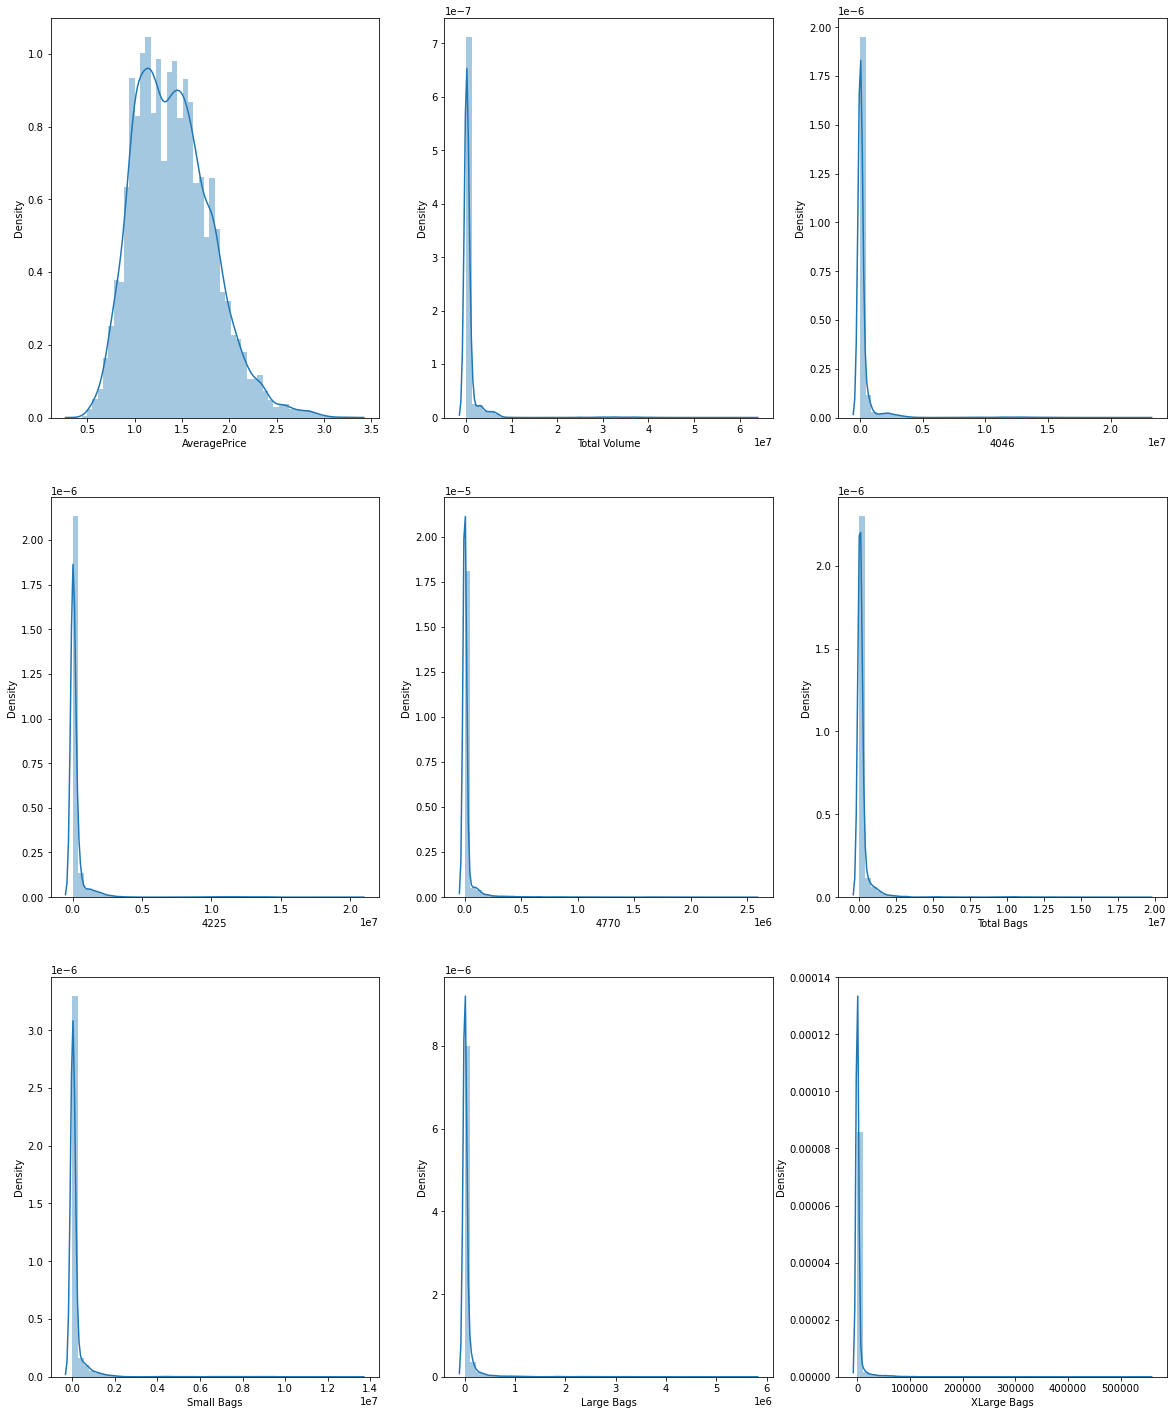

In [52]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel=(df2[column])
    plotnumber=plotnumber+1
plt.show()

Comment :

We can see skewed data with presence of outliers with sharp peak.

Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is 
resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

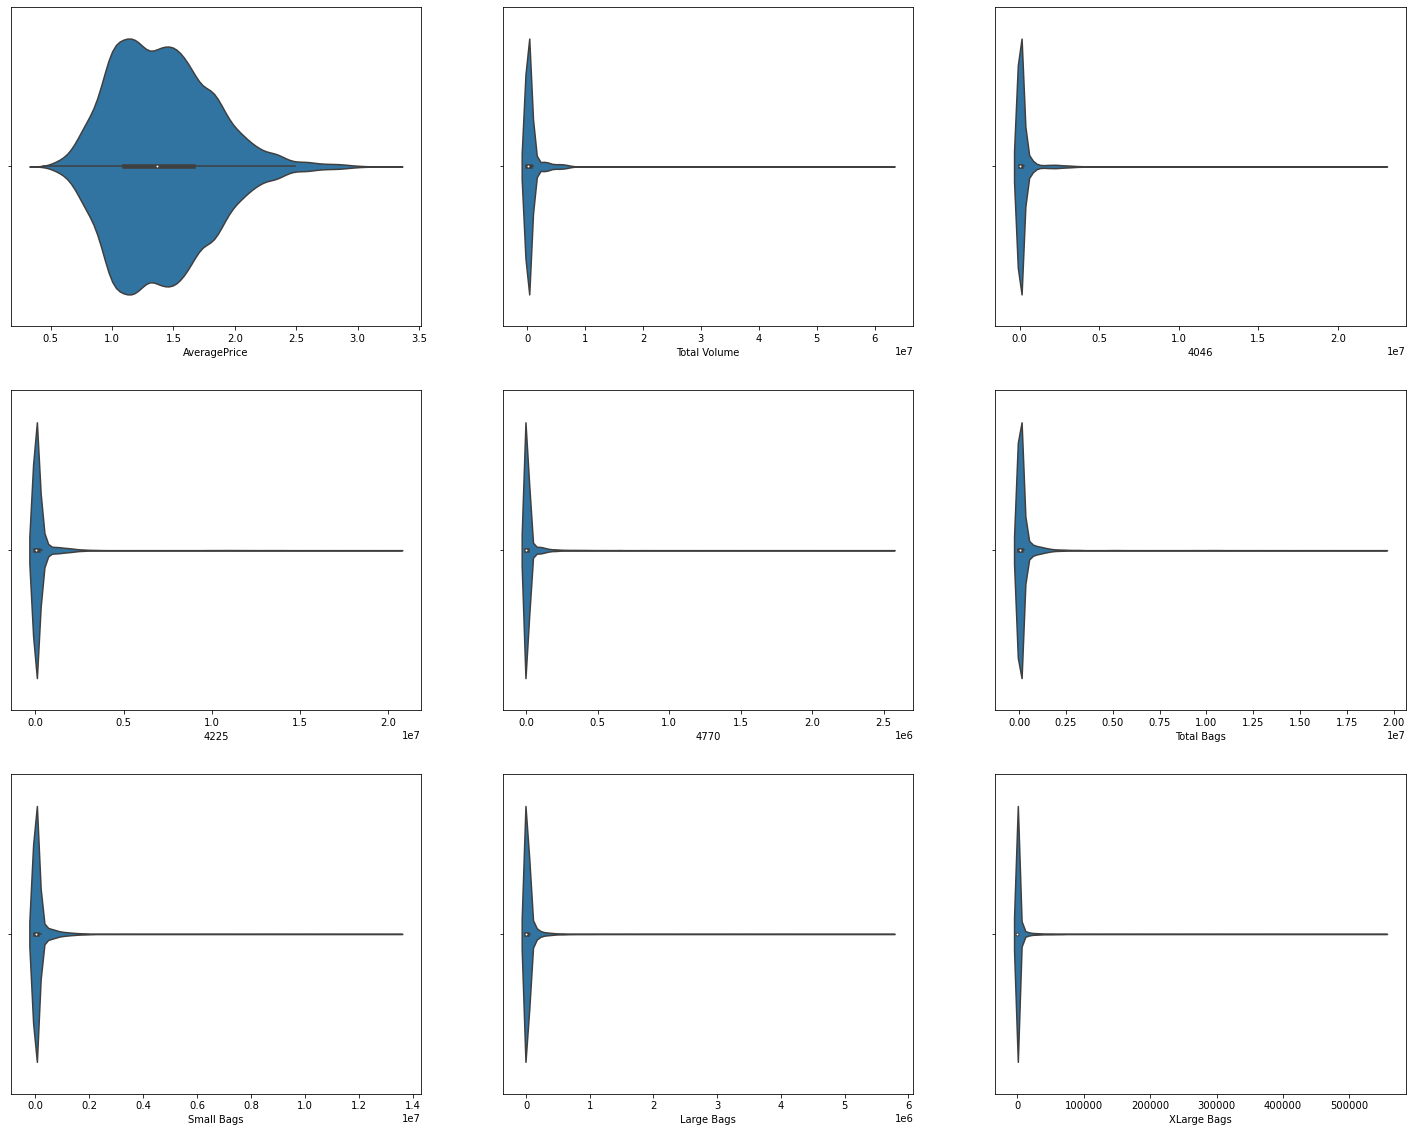

In [53]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in df2:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.violinplot(df2[column])
        plt.xlabel=(df2[column])
    plotnumber=plotnumber+1
plt.show()

Comment :

For Majority Average price is in range of 1 to 1.5.

there is not much significant change in rest of the plot.

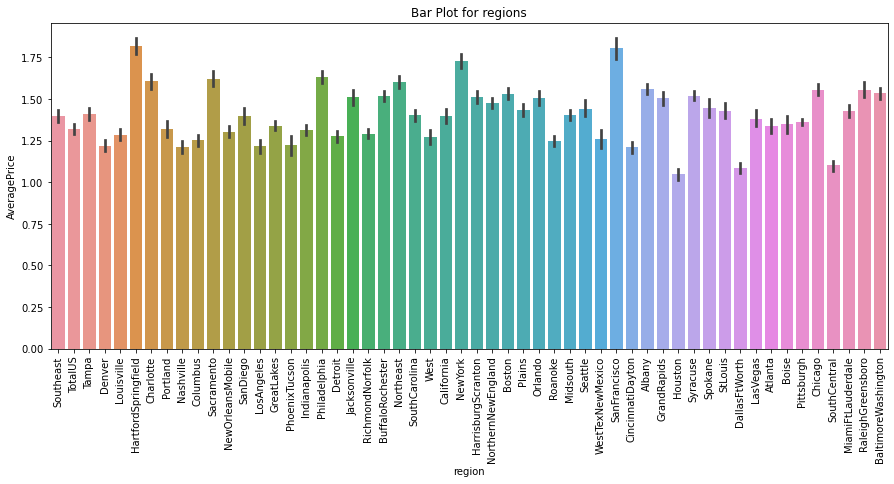

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

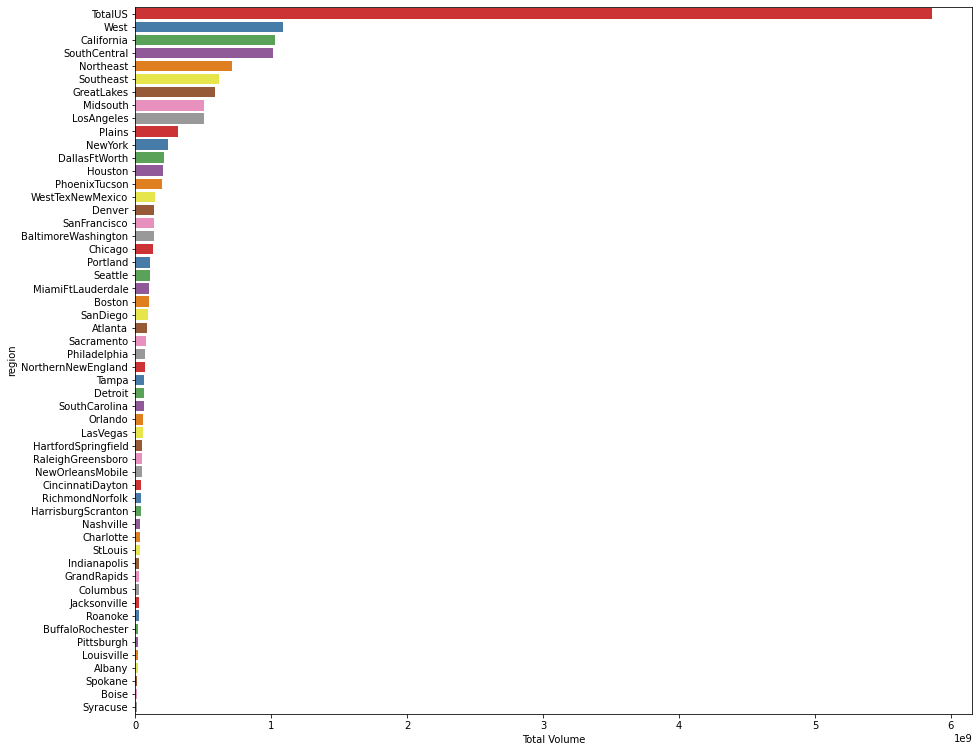

In [55]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [56]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

Comment on feature Region:

Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.

Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

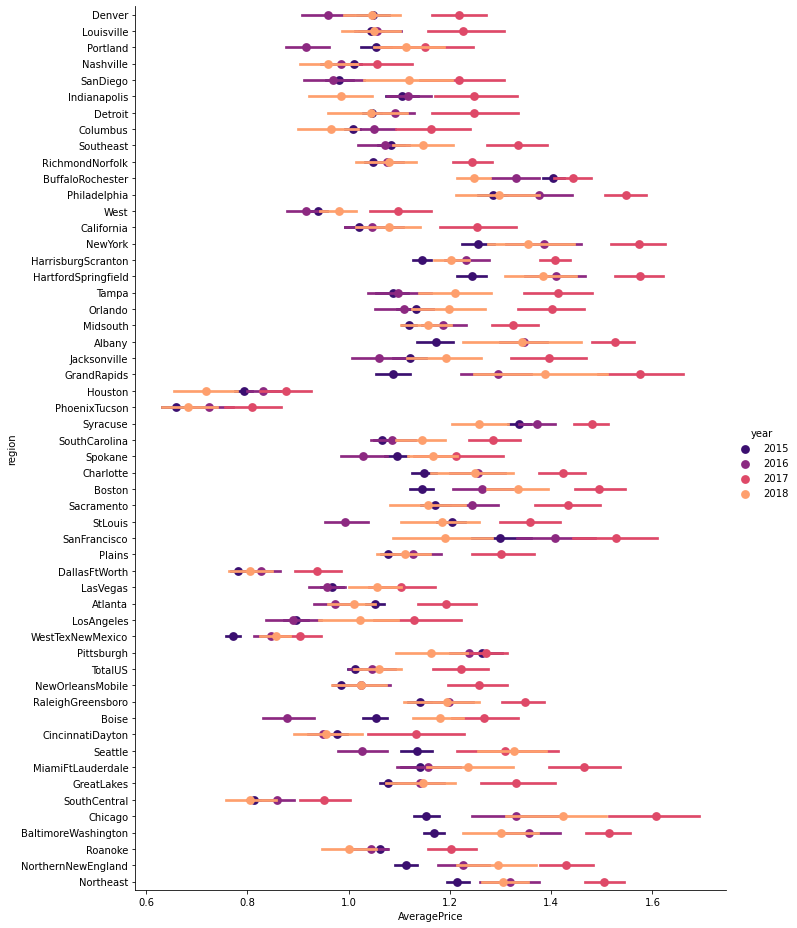

In [57]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,)

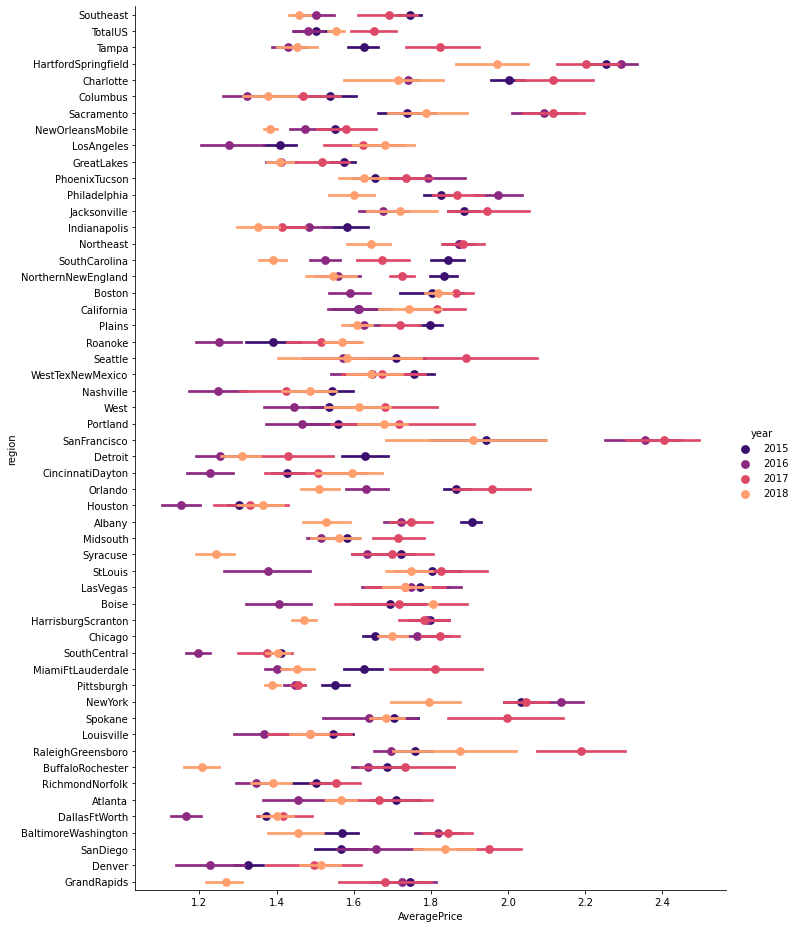

In [58]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

We can able to see the price region wise

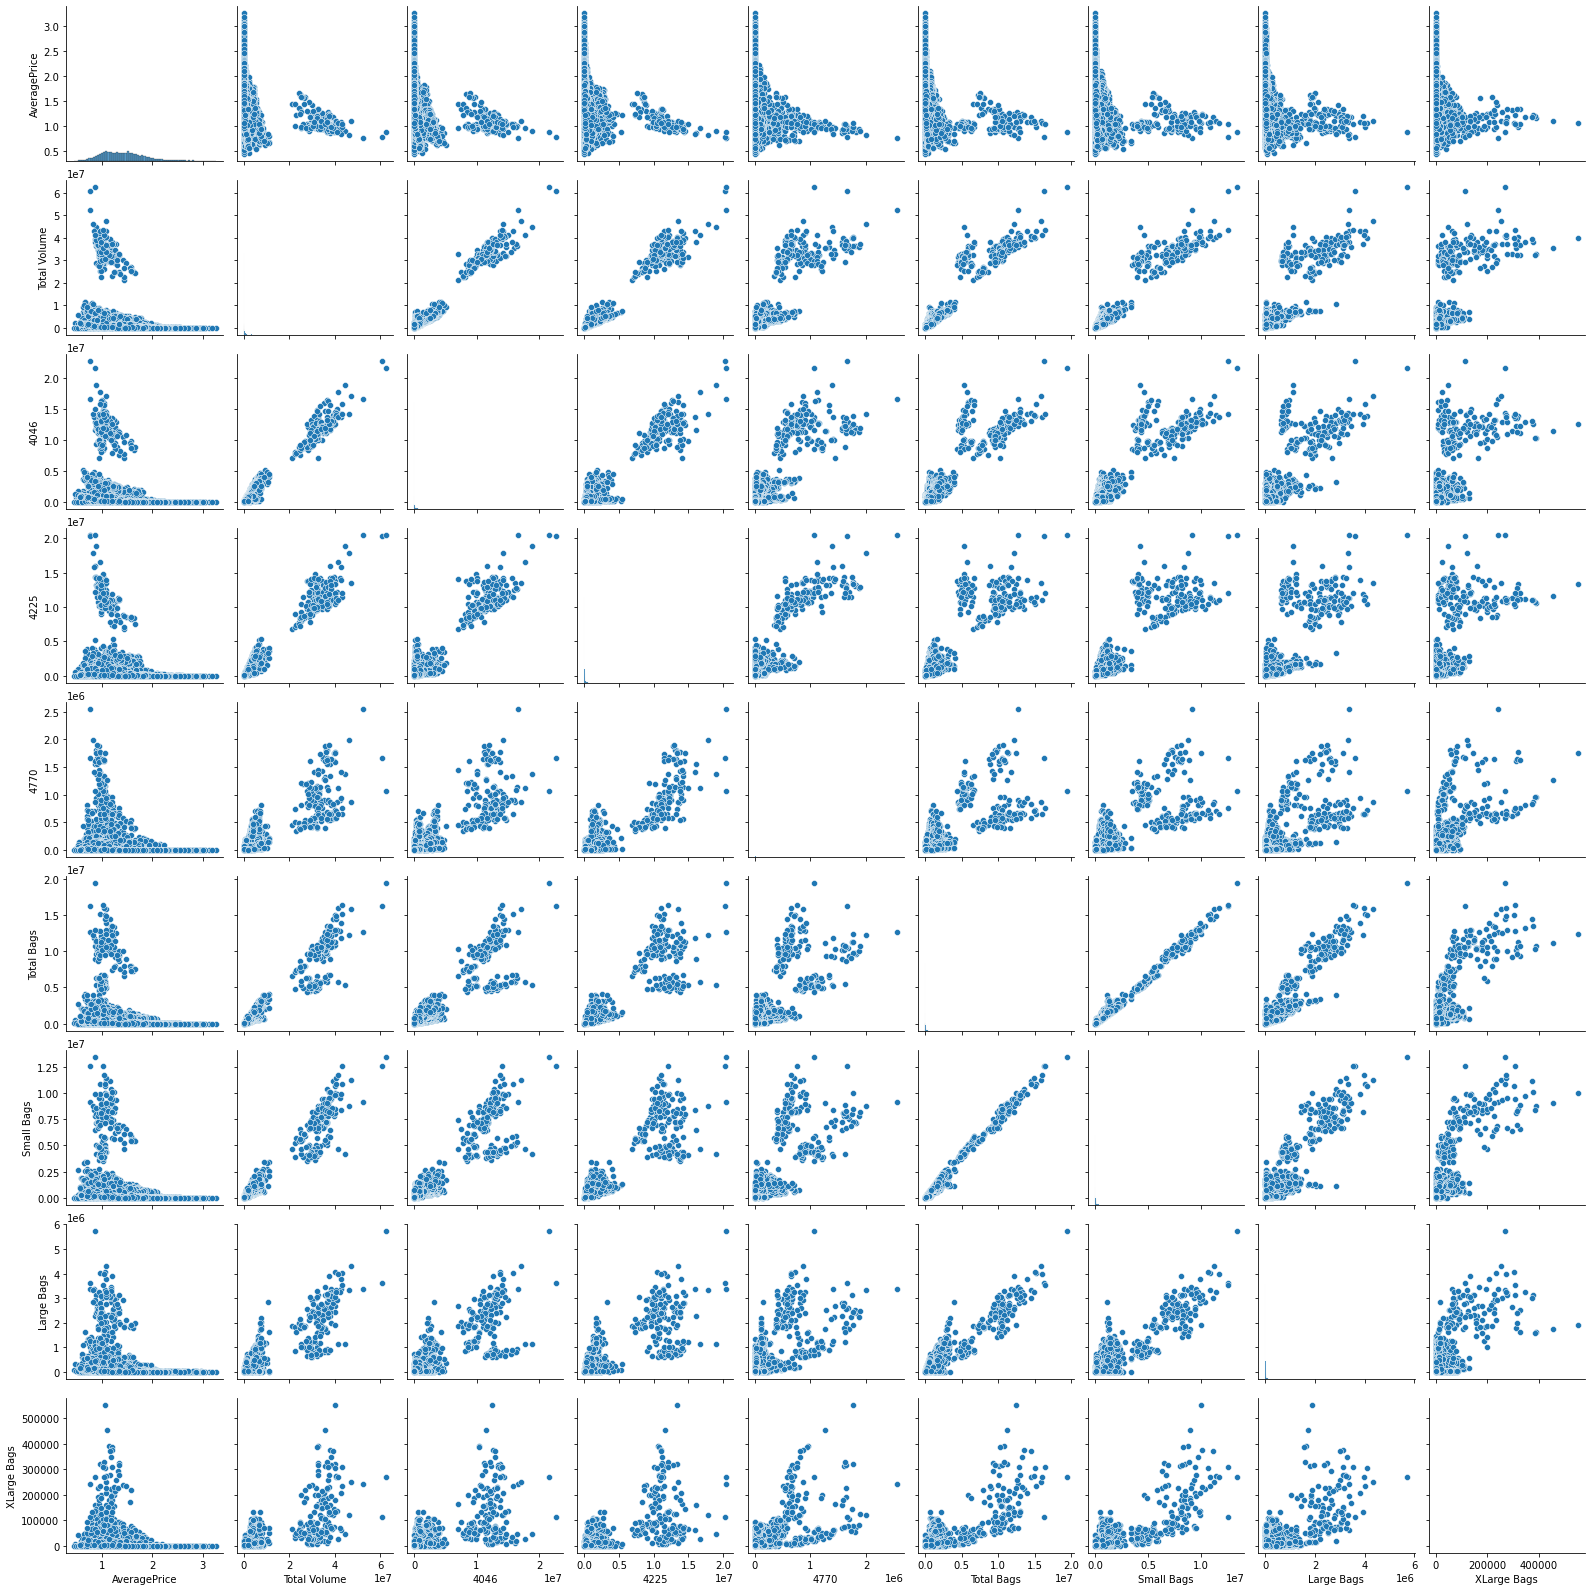

In [59]:
sns.pairplot(df2)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

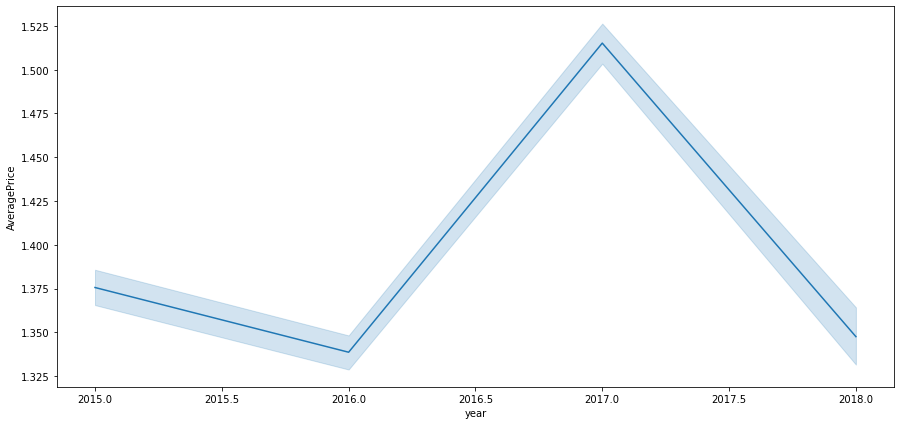

In [60]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year',y='AveragePrice',data=df)

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

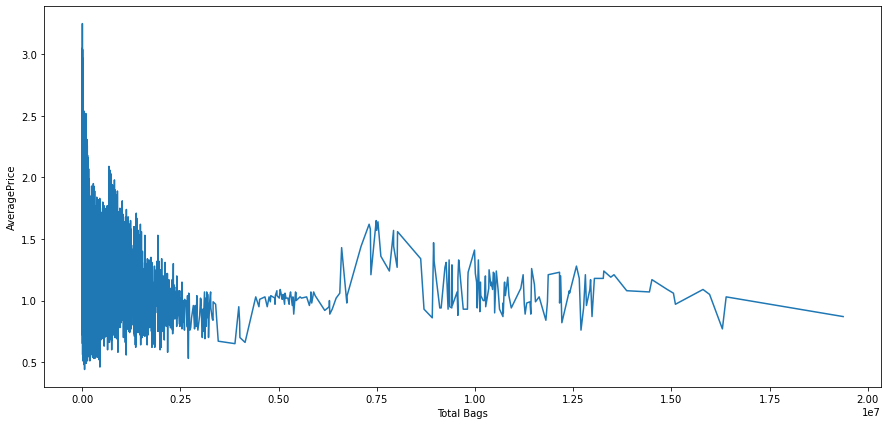

In [61]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df['Total Bags'],y='AveragePrice',data=df)

In [105]:
df=pd.read_csv('Avocado.csv')

In [106]:
# Copy of original dataframe
df3=df.copy()

In [107]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True)
df3

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  Year Month Day  
0                Albany  2015    12  27  
1                Albany  2015    12  20  
2                Albany  2015    12  13  
3                Albany  2015    12  06  
4                Albany  2015    11  29  
...                 ...   ...   ...  ..  
18244  WestTexNewMexico  2018    02  04  
18245  WestTexNewMexico  2018    01  28  
18246  WestTexNewMexico  2018    01  21  
18247  WestTexNewMexico  2018    01  14  
18248  WestTexNewMexico  2018    01  07  

[18249 rows x 15 columns]

In [108]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [109]:
df3.drop(columns=['Day'],axis=1, inplace=True)
df3.drop(columns=['Date'],axis=1, inplace=True)
df3.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [110]:
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  
0     8603.62       93.25          0.0  conventional  Albany  2015     12  
1     9408.07       97.49          0.0  conventional  Albany  2015     12  
2     8042.21      103.14          0.0  conventional  Albany  2015     12  
3     5677.40      133.76          0.0  conventional  Albany  2015     12  
4     5986.26      197.69          0.0  conventional  Albany  2015     11

# Univariate analysis 

In [77]:
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

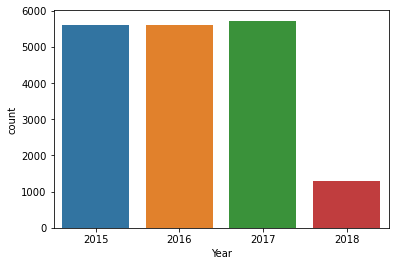

In [78]:
sns.countplot('Year',data=df3)

maximum sell was in the year 2017 with minute change from 2016 and 2017. minimum sell was in year 2018

<AxesSubplot:xlabel='Month', ylabel='count'>

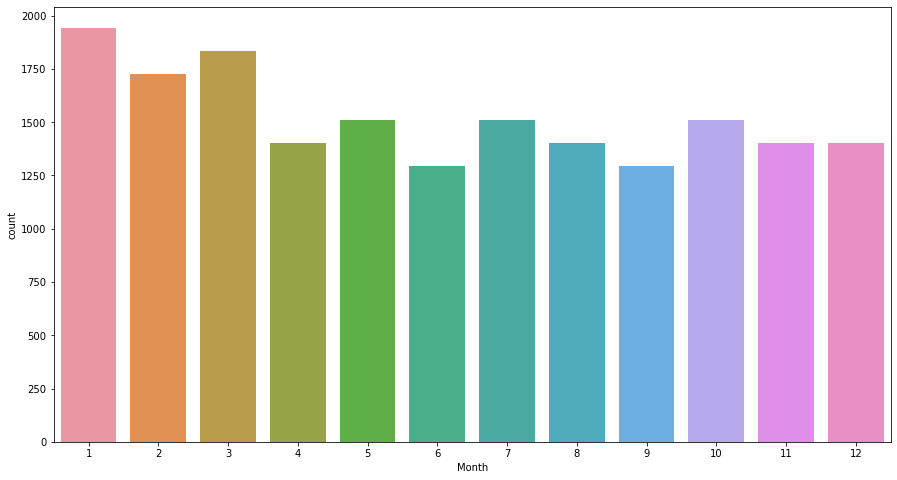

In [79]:
plt.figure(figsize=(15,8))
sns.countplot('Month',data=df3)

mamiximum sell was in month of january and minimum sell was in month of june

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

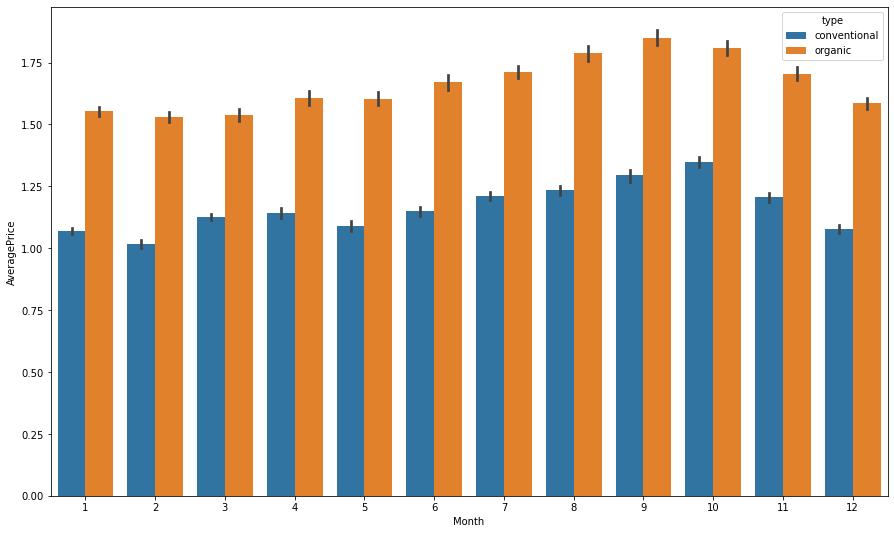

In [80]:
plt.figure(figsize=(15,9))
sns.barplot(y='AveragePrice',x='Month',hue='type',data=df3)

In [81]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

Comment :

In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.

There is not much upheaval in Organic type Avacoda over year peroid.

We can see that variation in mean price values in above groupby table, which confirm what we got from barplot


# Label Encoding

In [82]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8696.87     8603.62       93.25          0.0     0       0  2015     12  
1     9505.56     9408.07       97.49          0.0     0       0  2015     12  
2     8145.35     8042.21      103.14          0.0     0       0  2015     12  
3     5811.16     5677.40      133.76          0.0     0       0  2015     12  
4     6183.95     5986.26      197.69          0.0     0       0  2015     11

# Outliers Detection and Removable

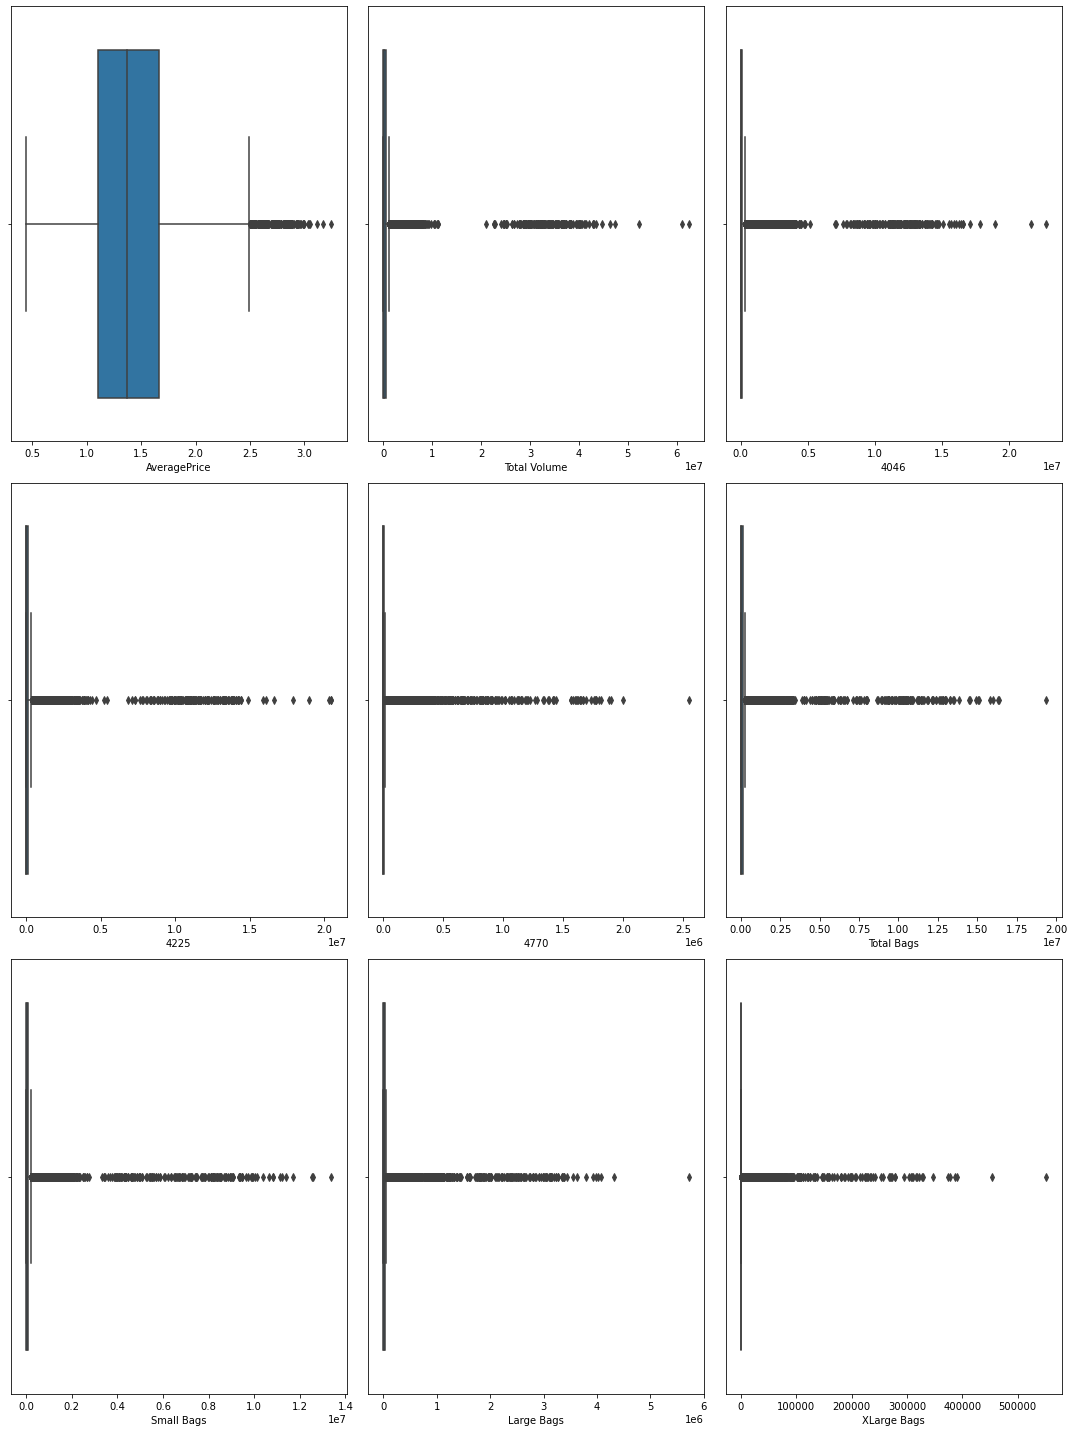

In [83]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in df2:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column])
    plotnumber= plotnumber+1
plt.tight_layout()
plt.show()

In [84]:
from scipy.stats import zscore

In [85]:
z=np.abs(zscore(df3))
threshold=3
df4=df3[(z<3).all(axis=1)]

In [86]:
df4.shape

(17651, 14)

In [87]:
print('Percentage Data Loss :',(18249-17651)/18249*100,'%')

Percentage Data Loss : 3.276891884486821 %


This dataloss is acceptable we can move with it

In [88]:
df4.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.126781      0.017336  0.019337  0.029467   
AveragePrice   -0.126781      1.000000     -0.332056 -0.333577 -0.243988   
Total Volume    0.017336     -0.332056      1.000000  0.876307  0.871592   
4046            0.019337     -0.333577      0.876307  1.000000  0.565118   
4225            0.029467     -0.243988      0.871592  0.565118  1.000000   
4770            0.052711     -0.243465      0.647518  0.492127  0.620221   
Total Bags     -0.016020     -0.297323      0.912184  0.727981  0.757786   
Small Bags     -0.011083     -0.275771      0.905648  0.706800  0.778761   
Large Bags     -0.026140     -0.270915      0.640642  0.561060  0.451711   
XLarge Bags    -0.012751     -0.152669      0.513741  0.415432  0.392030   
type            0.004325      0.613150     -0.415476 -0.341376 -0.383138   
region         -0.001651     -0.003242      0.076676  0.119067  0.011002   
Year           -0.170651      0.091704     -0.004866 -0.034636 -0.040234   
Month          -0.780789      0.149502     -0.018645 -0.015797 -0.019844   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.052711   -0.016020   -0.011083   -0.026140    -0.012751   
AveragePrice -0.243465   -0.297323   -0.275771   -0.270915    -0.152669   
Total Volume  0.647518    0.912184    0.905648    0.640642     0.513741   
4046          0.492127    0.727981    0.706800    0.561060     0.415432   
4225          0.620221    0.757786    0.778761    0.451711     0.392030   
4770          1.000000    0.557980    0.571512    0.323747     0.495976   
Total Bags    0.557980    1.000000    0.978213    0.746946     0.581690   
Small Bags    0.571512    0.978213    1.000000    0.593155     0.597700   
Large Bags    0.323747    0.746946    0.593155    1.000000     0.296864   
XLarge Bags   0.495976    0.581690    0.597700    0.296864     1.000000   
type         -0.321809   -0.378205   -0.367593   -0.286813    -0.263734   
region       -0.095972    0.085892    0.065976    0.127635    -0.044338   
Year         -0.082054    0.103442    0.086639    0.119543     0.108209   
Month        -0.027245   -0.010916   -0.013018   -0.001457     0.002843   

                  type    region      Year     Month  
Unnamed: 0    0.004325 -0.001651 -0.170651 -0.780789  
AveragePrice  0.613150 -0.003242  0.091704  0.149502  
Total Volume -0.415476  0.076676 -0.004866 -0.018645  
4046         -0.341376  0.119067 -0.034636 -0.015797  
4225         -0.383138  0.011002 -0.040234 -0.019844  
4770         -0.321809 -0.095972 -0.082054 -0.027245  
Total Bags   -0.378205  0.085892  0.103442 -0.010916  
Small Bags   -0.367593  0.065976  0.086639 -0.013018  
Large Bags   -0.286813  0.127635  0.119543 -0.001457  
XLarge Bags  -0.263734 -0.044338  0.108209  0.002843  
type          1.000000  0.018409  0.003867 -0.009499  
region        0.018409  1.000000 -0.004417  0.000119  
Year          0.003867 -0.004417  1.000000 -0.175287  
Month        -0.009499  0.000119 -0.175287  1.000000

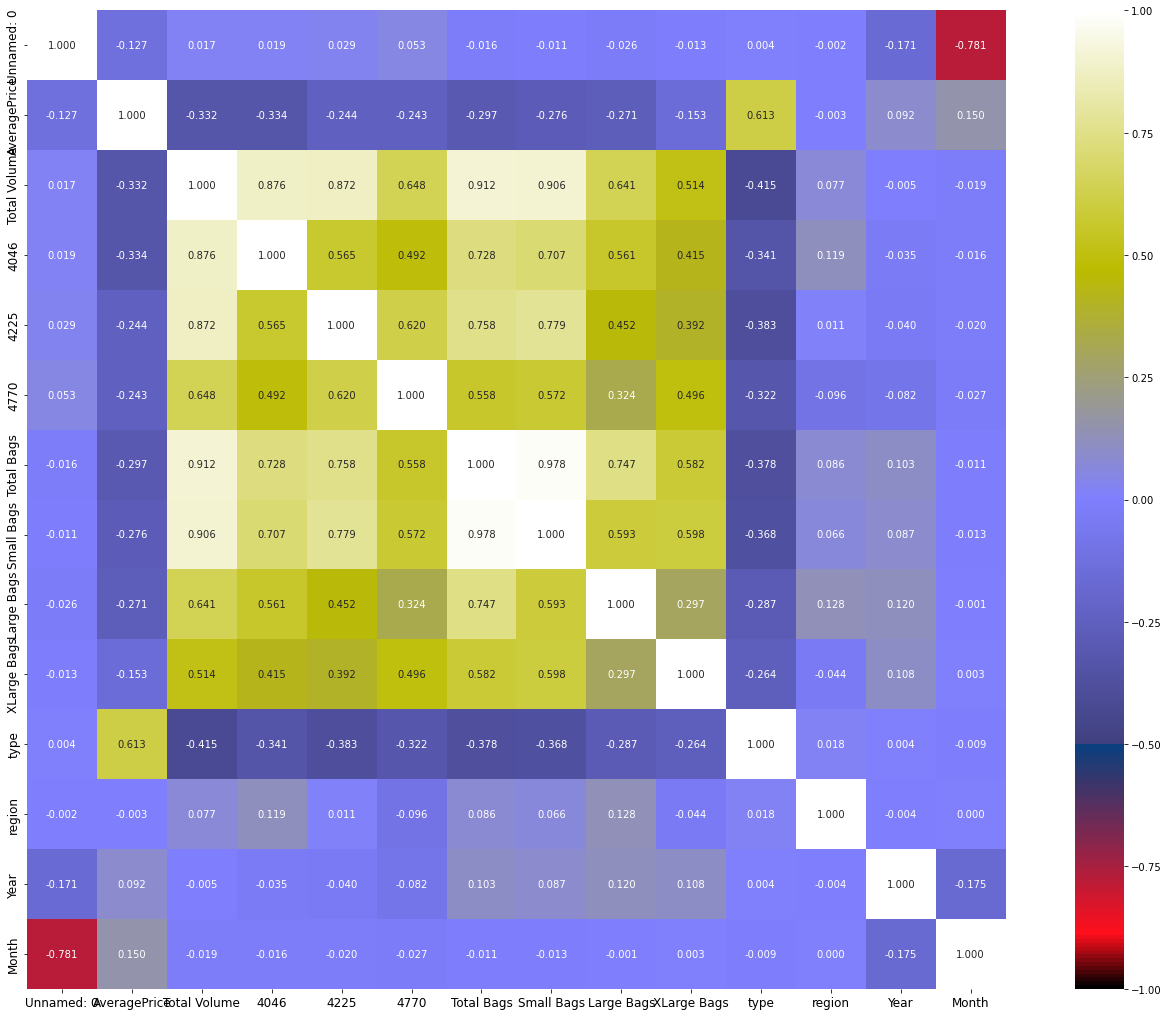

In [89]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

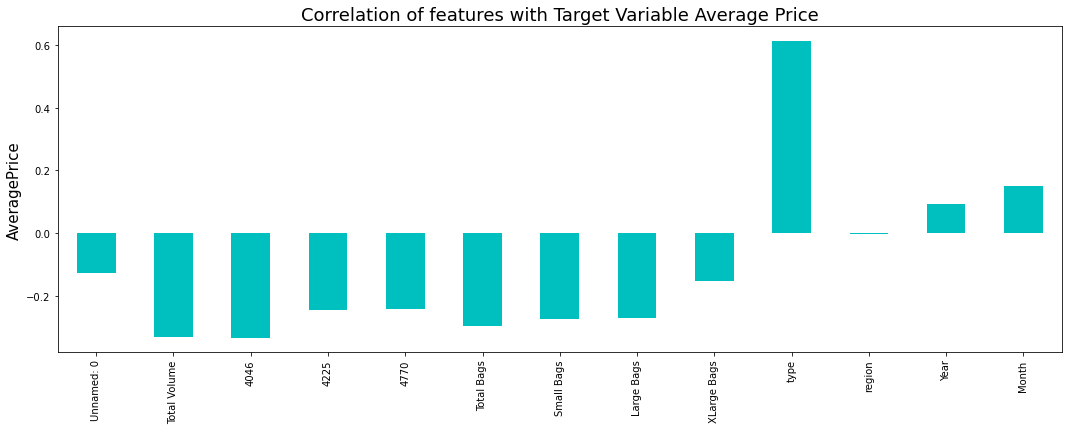

In [90]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

In [91]:
df4.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8696.87     8603.62       93.25          0.0     0       0  2015     12  
1     9505.56     9408.07       97.49          0.0     0       0  2015     12  
2     8145.35     8042.21      103.14          0.0     0       0  2015     12  
3     5811.16     5677.40      133.76          0.0     0       0  2015     12  
4     6183.95     5986.26      197.69          0.0     0       0  2015     11

Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.

Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
Total volume is highly correleated 4046.


Comment:

We are going to remove some of columns which are not reqire for further analysis

4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
Next is region feature, we also going drop this as it very poorly correlated with other features.

In [176]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

VIF      Features
0  24.367038  AveragePrice
1   7.754106  Total Volume
2   7.707277    Small Bags
3   1.970395    Large Bags
4   1.693456   XLarge Bags
5   3.643636          type
6  19.857116          Year
7   4.212261         Month

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [178]:
df4.drop(columns=['Year'],axis=1, inplace=True)

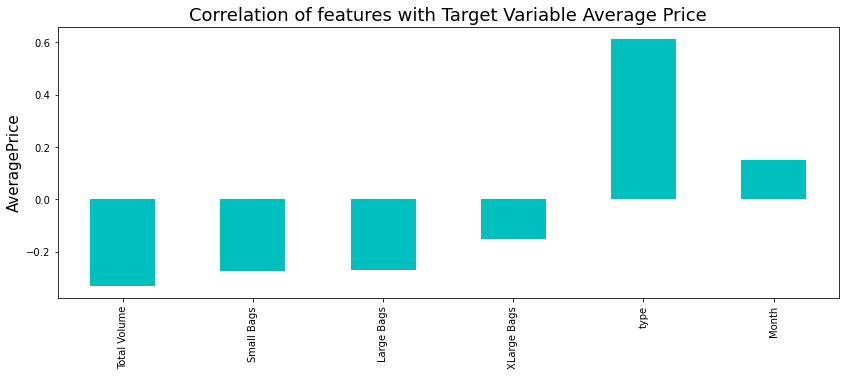

In [180]:
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

# Checking Skewness

In [181]:
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

### Transforming Skewness

In [182]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

# Standard  Scaling

In [186]:
X=df4.drop('AveragePrice',axis=1)
Y=df4['AveragePrice']

In [188]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

# Machine Learning Model Building

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,random_state=45,test_size=.34)
print('Training Feature matix size',X_train.shape)
print('Training Target vector size',Y_train.shape)
print('Test Features',X_test.shape)
print('Test Target vector size',Y_test.shape)

Training Feature matix size (11649, 6)
Training Target vector size (11649,)
Test Features (6002, 6)
Test Target vector size (6002,)


In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,900):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.32)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.47003503531704627 on Random_state 449


# Linear Regression : Base model

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=449, test_size=.32)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted AveragePrice:',y_pred)
print('\n')
print('Actual AveragePrice:',Y_test)

Predicted AveragePrice: [1.64453864 1.19673358 1.69828786 ... 1.61896709 1.09969599 1.29498428]


Actual AveragePrice: 10858    1.79
5433     0.93
16371    1.85
14981    2.12
2507     1.15
         ... 
14856    1.81
10483    1.66
17180    1.57
1445     1.09
1875     0.73
Name: AveragePrice, Length: 5649, dtype: float64


## Linear Regression Evaluation Matrix

In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Error :
Mean absolute error : 0.22324958849175508
Mean squared error : 0.07990967973817452
Root Mean Squared Error: 0.28268300220949705


R2 Score :
0.47003503531704627


In [233]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =8)
print('Cross Validation Score :',lin_reg)
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression()
Mean CV Score : -0.03525522516224175


In [234]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print(' Error of ', m, ':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('R2 Score :')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.1615929218092083
Mean squared error : 0.04686202589900701
Root Mean Squared Error: 0.2164763864697649


R2 Score :
0.6892087168674434


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22324959551557594
Mean squared error : 0.07990968396535716
Root Mean Squared Error: 0.28268300968639265


R2 Score :
0.4700350072821611


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.21005841741901218
Mean squared error : 0.0910389803505045
Root Mean Squared Error: 0.30172666496434236


R2 Score :
0.396224960927


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.22094847902342216
Mean squared error : 0.07630544104365652
Root Mean Squared Error: 0.2762343951133829


R2 Score :
0.4939385253411298


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.1995286854823129
Mean squared error : 0.08151962723104256
Root Mean Squared Error: 0.285516421998

In [235]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.19410900689126137


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.013709058462104795


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8381605997690853


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.027684011342350746


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.770539013974467


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_le

Among all Model Random Forest Regressor gave us maximum R2 score of0.6892087168674434.So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [239]:
from sklearn.model_selection import GridSearchCV

In [242]:
## Hyperparameter Tuning of RandomForest
parameter={'criterion':['mse'],
       'n_estimators':[100],
        'max_features':['auto'],
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[1,2,3,4,5,6]
       }

In [243]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [244]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100]},
             verbose=3)

In [245]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 100}

In [249]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(criterion='mse',
       n_estimators=100,
        max_features='auto',
        max_depth=8,
        min_samples_split=4)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print(' Error in Final Model :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.18731161488867842
Mean squared error : 0.05781432157342904
Root Mean Squared Error: 0.2404460887047844


R2 Score of Final Model :
0.6165725480164315




True Values Vs Predicted Value plot :


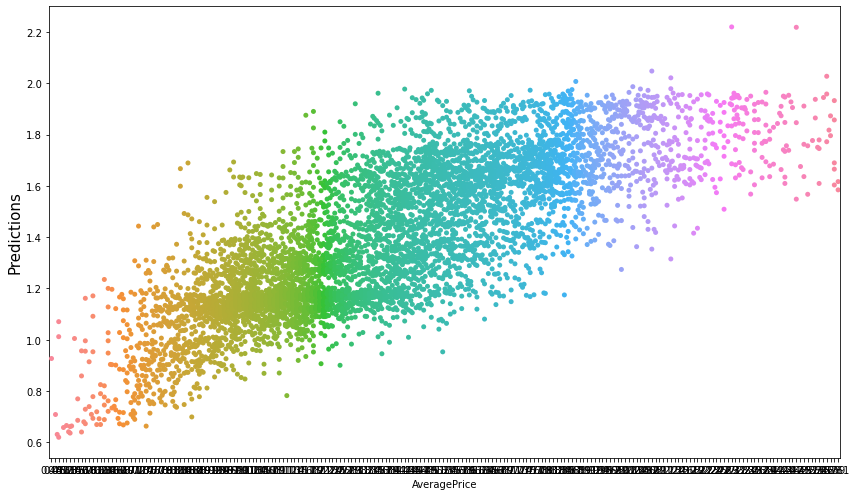

In [258]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('True Values Vs Predicted Value plot :')
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving model

In [259]:
import joblib
joblib.dump(Final_mod,'Avacado.pkl')

['Avacado.pkl']

# Classification

In [111]:
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  
0     8603.62       93.25          0.0  conventional  Albany  2015     12  
1     9408.07       97.49          0.0  conventional  Albany  2015     12  
2     8042.21      103.14          0.0  conventional  Albany  2015     12  
3     5677.40      133.76          0.0  conventional  Albany  2015     12  
4     5986.26      197.69          0.0  conventional  Albany  2015     11

In [112]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8603.62       93.25          0.0     0       0  2015     12  
1     9408.07       97.49          0.0     0       0  2015     12  
2     8042.21      103.14          0.0     0       0  2015     12  
3     5677.40      133.76          0.0     0       0  2015     12  
4     5986.26      197.69          0.0     0       0  2015     11

In [113]:
df3.tail()

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
18244          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
18244    13066.82      431.85          0.0     1      53  2018      2  
18245     8940.04      324.80          0.0     1      53  2018      1  
18246     9351.80       42.31          0.0     1      53  2018      1  
18247    10919.54       50.00          0.0     1      53  2018      1  
18248    11988.14       26.01          0.0     1      53  2018      1

In [ ]:
df4=df3[['4225','4046','Total Volume','Small Bags','Total Bags','Large Bags','4770','XLarge Bags']]

# Standard Scaling

In [114]:
X_new = df3.drop('region', axis=1)
Y_new = df3['region']

In [115]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_new = scaler.fit_transform(X_new)

# Machine Learning model building

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [117]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_scale_new, Y_new, random_state=42, test_size=.3)
print('Training feature matrix :',X_new_train.shape)
print('Training target vector :',Y_new_train.shape)
print('Test feature matrix :',X_new_test.shape)
print('Test target vector :',Y_new_test.shape)

Training feature matrix : (12774, 12)
Training target vector : (12774,)
Test feature matrix : (5475, 12)
Test target vector : (5475,)


In [118]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_new_train,Y_new_train)
    y_new_pred=m.predict(X_new_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :','\n', accuracy_score(Y_new_test, y_new_pred))
    print('\n')
    print('Confusion matrix :','\n',confusion_matrix(Y_new_test, y_new_pred))
    print('\n')
    print('Classification Report :','\n',classification_report(Y_new_test, y_new_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 
 0.23616438356164385


Confusion matrix : 
 [[22  0  2 ...  0  0  0]
 [ 9  8  2 ...  0  0  6]
 [ 3  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 3  0  0 ...  1 58  0]
 [10  4  0 ...  0  0 24]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.05      0.23      0.08        96
           1       0.25      0.08      0.12       103
           2       0.29      0.35      0.32        95
           3       0.09      0.04      0.06        98
           4       0.19      0.16      0.18       104
           5       0.11      0.04      0.06       109
           6       0.96      0.48      0.64        99
           7       0.21      0.07      0.11       113
           8       0.88      0.50      0.64       105
           9       0.24      0.23      0.23       109
          10       0.06      0.14      0.08       104
          11       0.48      0.31      0.38     

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=12) is


Accuracy Score : 
 0.2726940639269406


Confusion matrix : 
 [[12  2  2 ...  0  0  1]
 [ 5 35  2 ...  0  0  2]
 [ 4  4 41 ...  0  0  1]
 ...
 [ 0  0  0 ... 97  0  0]
 [ 0  1  2 ...  0 58  1]
 [ 2  2  2 ...  0  0 34]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.07      0.12      0.09        96
           1       0.19      0.34      0.24       103
           2       0.24      0.43      0.31        95
           3       0.12      0.20      0.15        98
           4       0.22      0.35      0.27       104
           5       0.15      0.26      0.19       109
           6       0.47      0.59      0.52        99
           7       0.15      0.21      0.18       113
           8       0.43      0.64      0.52       105
           9       0.25      0.36      0.29       109
          10       0.09      0.11      0.10       104
          11      

Classification ML Algorithm Evaluation Matrix GradientBoostingClassifier() is


Accuracy Score : 
 0.8270319634703196


Confusion matrix : 
 [[85  0  0 ...  0  0  0]
 [ 0 79  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  0  1 ...  0  0 73]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        96
           1       0.64      0.77      0.70       103
           2       0.93      0.93      0.93        95
           3       0.89      0.80      0.84        98
           4       0.88      0.88      0.88       104
           5       0.73      0.73      0.73       109
           6       0.94      0.92      0.93        99
           7       0.87      0.81      0.83       113
           8       0.98      0.92      0.95       105
           9       0.85      0.81      0.83       109
          10       0.71      0.71      0.71       104
          11       0.86   

# Cross Validation Score

In [119]:
from sklearn.model_selection import cross_val_score
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

In [120]:
for m in model:
    score = cross_val_score(m, X_new, Y_new, cv =5)
    print('\n')
    print('Cross Validation Score',m,'\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('======================================================================================================')



Cross Validation Score SVC() 

Score : [0.26794521 0.40547945 0.1860274  0.02       0.01863524]
Mean Score : 0.17961745946534424
Std deviation : 0.1484921043354326




Cross Validation Score GaussianNB() 

Score : [0.54082192 0.38109589 0.19178082 0.01863014 0.01890929]
Mean Score : 0.23024761146795708
Std deviation : 0.20500592111081836




Cross Validation Score DecisionTreeClassifier() 

Score : [0.46794521 0.68931507 0.6290411  0.54630137 0.39161414]
Mean Score : 0.5448433761173075
Std deviation : 0.10710366832515557




Cross Validation Score KNeighborsClassifier(n_neighbors=12) 

Score : [0.46273973 0.64575342 0.50410959 0.33671233 0.23485887]
Mean Score : 0.4368347867871475
Std deviation : 0.14118267708746868




Cross Validation Score RandomForestClassifier() 

Score : [0.63643836 0.82328767 0.76438356 0.68821918 0.48342012]
Mean Score : 0.679149776444663
Std deviation : 0.11683933468816404




Cross Validation Score AdaBoostClassifier() 

Score : [0.0369863  0.05315068 0.084

From the above data we can see the minimum difference between accuracy score and cross validation score can be observed in RandomForestClassifier. So we will do hypertuning to it

# Hyper Parameter Tuning : GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [124]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_new_train,Y_new_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [125]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'sqrt',
 'n_estimators': 60}

# Final Model

In [127]:
Final_mod = RandomForestClassifier(criterion='gini',n_estimators= 60, max_depth=60 ,max_features='sqrt')
Final_mod.fit(X_new_train,Y_new_train)
y_new_pred=Final_mod.predict(X_new_test)
print('Accuracy Score :','\n', accuracy_score(Y_new_test, y_new_pred))

Accuracy Score : 
 0.9021004566210046


# Saving Model

In [132]:
import joblib
joblib.dump(Final_mod,'Avacado_classification.pkl')

['Avacado_classification.pkl']